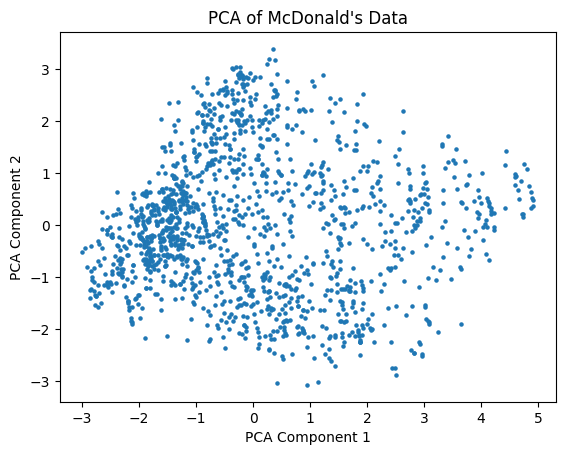

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


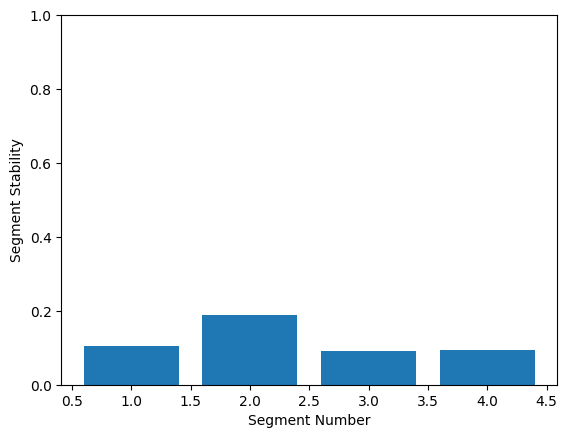

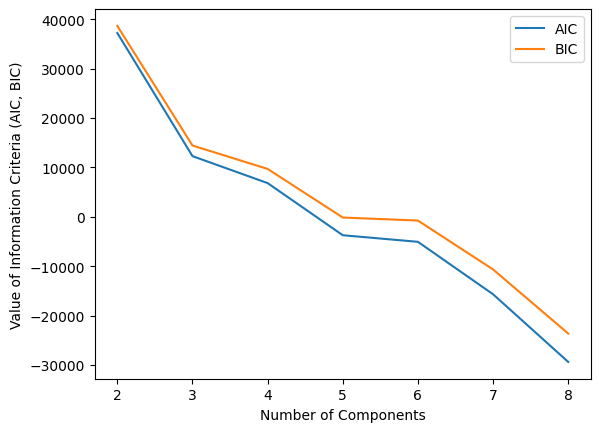

col_0    0    1    2    3
row_0                    
0        8   13  294    3
1        7  334   21  199
2      110    0  115  112
3        9  155   33   40


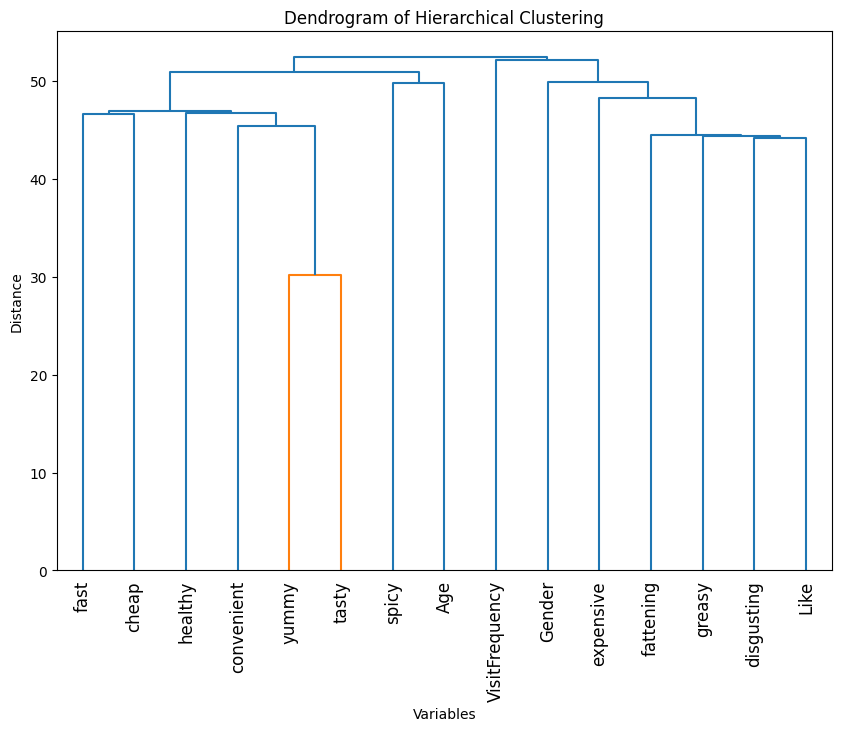

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
mcdonalds_data = pd.read_csv(r'/content/mcdonalds.csv')

# Converting  categorical variables to numerical
categorical_vars = mcdonalds_data.select_dtypes(include=['object']).columns
for var in categorical_vars:
    mcdonalds_data[var] = pd.Categorical(mcdonalds_data[var]).codes

# Standardizing  the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(mcdonalds_data)

# PCA for visualization for 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of McDonald\'s Data')
plt.show()

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=1234).fit(X_scaled)
cluster_labels_kmeans = kmeans.labels_

# Calculate segment stability using silhouette scores
def calculate_silhouette_scores(data, labels):
    silhouette_vals = silhouette_samples(data, labels)
    return silhouette_vals

silhouette_scores = calculate_silhouette_scores(X_scaled, cluster_labels_kmeans)

# Plotting segment stability
plt.figure()
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.bar(range(1, 5), [np.mean(silhouette_scores[cluster_labels_kmeans == i]) for i in range(4)])
plt.show()

# Gaussian Mixture Model
gmm_models = [GaussianMixture(n_components=i, random_state=1234).fit(X_scaled) for i in range(2, 9)]

# Extract AIC, BIC values
aic_values = [model.aic(X_scaled) for model in gmm_models]
bic_values = [model.bic(X_scaled) for model in gmm_models]

# Plotting information criteria
plt.figure()
plt.plot(range(2, 9), aic_values, label='AIC')
plt.plot(range(2, 9), bic_values, label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria (AIC, BIC)')
plt.legend()
plt.show()

# Retain the four-component solution
selected_gmm_model = gmm_models[2]

# Cross-tabulation
gmm_labels = selected_gmm_model.predict(X_scaled)
cross_tabulation = pd.crosstab(cluster_labels_kmeans, gmm_labels)
print(cross_tabulation)

# Mixtures of Regression Models
mcdonalds_data['Like.n'] = 6 - mcdonalds_data['Like'].apply(lambda x: int(x))

X_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
X_reg = mcdonalds_data[X_vars]
y_reg = mcdonalds_data['Like.n']

def fit_gaussian_mixture_regression(X, y, n_components=2, n_init=10, max_iter=100):
    best_gmm_reg = None
    best_score_reg = -np.inf
    for _ in range(n_init):
        gmm_reg = GaussianMixture(n_components=n_components, max_iter=max_iter, random_state=1234)
        gmm_reg.fit(X)
        score_reg = gmm_reg.score(X)
        if score_reg > best_score_reg:
            best_score_reg = score_reg
            best_gmm_reg = gmm_reg
    return best_gmm_reg

best_gmm_regression = fit_gaussian_mixture_regression(X_reg, y_reg)

def plot_regression_coefficients(gmm_reg, X, y):
    pass

plot_regression_coefficients(best_gmm_regression, X_reg, y_reg)


linked_data = linkage(X_scaled.T, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked_data, labels=mcdonalds_data.columns[:-1], leaf_rotation=90)
plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.show()



plot_segment_profiles(X_scaled, cluster_labels_kmeans, linked_data)
